In [1]:
#No change needs here

'''Define CMIP list'''
# This cell lists CMIP/PMIP model groups

pmip_v4='PMIP4'
pmip_v3='PMIP3'
pmip={}
pmip['PMIP4']=['AWI-CM-1-1-LR',
               'CESM2',
               'EC-EARTH-3-3',
               'FGOALS-f3-L',
               'FGOALS-g3',
               'GISS-E2-1-G',
               'HadGEM3-GC31',
               'IPSL-CM6A-LR',
               'MIROC-ES2L',
               'MPI-ESM1-2-LR',
               'MRI-ESM2-0',
               'NESM3',
               'NorESM1-F',
               'NorESM2',
               'UofT-CCSM-4']
pmip['PMIP3']=['BCC-CSM1-1',
               'CCSM4',
               'CNRM-CM5',
               'CSIRO-Mk3L-1-2',
               'CSIRO-Mk3-6-0',
               'EC-EARTH-2-2',
               'FGOALS-g2',
               'FGOALS-s2',
               'GISS-E2-R',
               'HadGEM2-CC',
               'HadGEM2-ES',
               'IPSL-CM5A-LR',
               'KCM1-2-2',
               'MIROC-ESM',
               'MPI-ESM-P',
               'MRI-CGCM3']
               
               
         

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xesmf as xe
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import math
import xlrd
import os
import matplotlib.colors as colors
import seaborn as sns
import scipy
from sklearn.metrics import mean_squared_error
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.floating_axes as FA
import mpl_toolkits.axisartist.grid_finder as GF
import matplotlib
import matplotlib.collections as collections
import regionmask



In [3]:
AMOC={}
AMOC['model']=['CCSM4','FGOALS-G2','MPI-ESM-P','MRI-CGCM3']
AMOC['mh-30']=[20.5,23.3,20.0,15.5]
AMOC['mh-50']=[15.8,18.0,16.8,14.6]
AMOC['pi-30']=[20.7,23.6,19.4,16.5]
AMOC['pi-50']=[16.3,18.3,16.5,13.8]

In [4]:
AMOC_new={}
AMOC_new['model']=['CCSM4','CESM2','FGOALS-g2','GISS-E2-1-G','MPI-ESM-P','MRI-CGCM3']
AMOC_new['mh-30']=[37.957580,36.766790,42.793755,44.172817,41.046340,30.392967]
AMOC_new['mh-50']=[29.524508,41.607290,35.997196,33.647390,33.103580,29.782633]
AMOC_new['pi-30']=[38.742752,37.280020,43.777820,48.324627,44.515366,29.945290]
AMOC_new['pi-50']=[31.309920,40.645443,34.720238,34.208576,37.182620,28.688343]



In [5]:
df= pd.read_csv('AMOC.csv',skipinitialspace=True,header=0)  



In [6]:
df

,VAR,CCSM4,CESM2,FGOALS-g2,GISS-E2-1-G,MPI-ESM-P,MRI-CGCM3
0,MH-30,37.957580,36.766790,42.793755,44.172817,41.046340,30.392967
1,MH-50,29.524508,41.607290,35.997196,33.647390,33.103580,29.782633
2,PI-30,38.742752,37.280020,43.777820,48.324627,44.515366,29.945290
3,PI-50,31.309920,40.645443,34.720238,34.208576,37.182620,28.688343


In [7]:
len(df)

4

In [6]:
amoc3={}
amoc4={}
m3=[]
m4=[]
models=['CCSM4','CESM2','FGOALS-g2','GISS-E2-1-G','MPI-ESM-P','MRI-CGCM3']
for m in models:
    if m in pmip[pmip_v3]:
        m3.append(m)
        amoc3[m]=df[m]
    if m in pmip[pmip_v4]:
        amoc4[m]=df[m]
        m4.append(m)

In [43]:
cc=[]
for i in range(len(models)):
    cc.append([i,i])

In [44]:
cc

[[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5]]

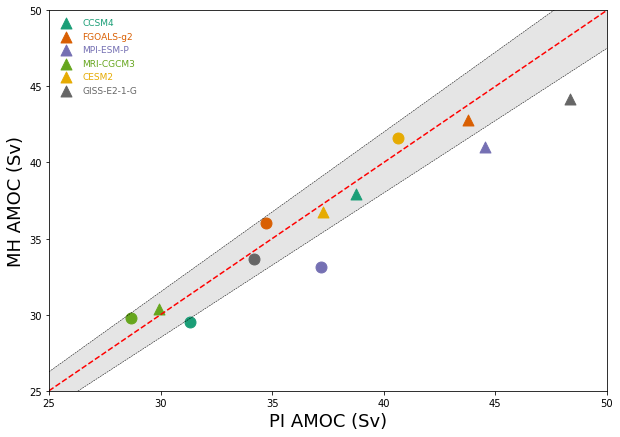

In [17]:

plt.figure(figsize=(10,7))
plt.xlim(25,50)
plt.ylim(25,50)

x1=np.arange(25,51)
y1=x1
y2=0.95*x1
y3=1.05*x1
plt.plot(x1,y1,"r--")
plt.plot(x1,y2,"k--",lw=0.5)
plt.plot(x1,y3,"k--",lw=0.5)
plt.fill_between(x1, y2, y3,facecolor='k', alpha=0.1)



 
colormap = plt.get_cmap('Dark2') #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(models))] 
    
for i in range(len(m3)):
    plt.scatter(amoc3[m3[i]][2],amoc3[m3[i]][0],s=120,color=colorst[i],marker='^',label=m3[i])
    plt.scatter(amoc3[m3[i]][3],amoc3[m3[i]][1],s=120,color=colorst[i],marker='o')           
for i in range(len(m4)):
    plt.scatter(amoc4[m4[i]][2],amoc4[m4[i]][0],s=120,color=colorst[i+len(m3)],marker='^',label=m4[i])
    plt.scatter(amoc4[m4[i]][3],amoc4[m4[i]][1],s=120,color=colorst[i+len(m3)],marker='o')

leg=plt.legend(edgecolor='None',facecolor='None',fontsize=9)
for h, t in zip(leg.legendHandles, leg.get_texts()):
    t.set_color(h.get_facecolor()[0])




plt.xlabel('PI AMOC (Sv)',fontsize=18)
plt.ylabel('MH AMOC (Sv)',fontsize=18)


plt.savefig('figs/AMOC_new_models_all.png')



In [11]:
z1=np.arange(0,4)
z2=np.arange(4,6)

In [18]:
z3=np.arange(0,6)

<Figure size 720x504 with 0 Axes>

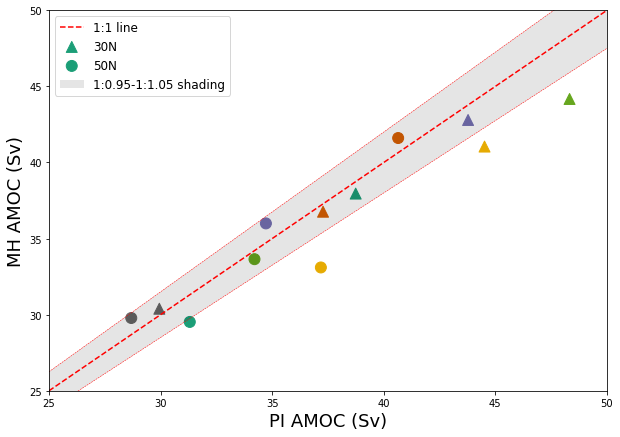

In [16]:
cmap = plt.get_cmap('Dark2') #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(models))] 

plt.figure(figsize=(10,7))

plt.figure(figsize=(10,7))
plt.xlim(25,50)
plt.ylim(25,50)
plt.scatter(AMOC_new['pi-30'],AMOC_new['mh-30'],s=120,c=colorst,cmap=cmap,marker='^',label='30N')
plt.scatter(AMOC_new['pi-50'],AMOC_new['mh-50'],s=120,c=colorst,cmap=cmap,marker='o',label='50N')

x1=np.arange(25,51)
y1=x1
y2=0.95*x1
y3=1.05*x1
plt.plot(x1,y1,"r--",label='1:1 line')
plt.plot(x1,y2,"r--",lw=0.5)
plt.plot(x1,y3,"r--",lw=0.5)
plt.fill_between(x1, y2, y3,facecolor='k', alpha=0.1,label='1:0.95-1:1.05 shading')
plt.legend(fontsize=12,edgecolor='None',facecolor='None')
plt.xlabel('PI AMOC (Sv)',fontsize=18)
plt.ylabel('MH AMOC (Sv)',fontsize=18)
plt.legend(fontsize=12)


plt.savefig('figs/AMOC_new_lat.png')


Text(0, 0.5, 'MH AMOC (Sv)')

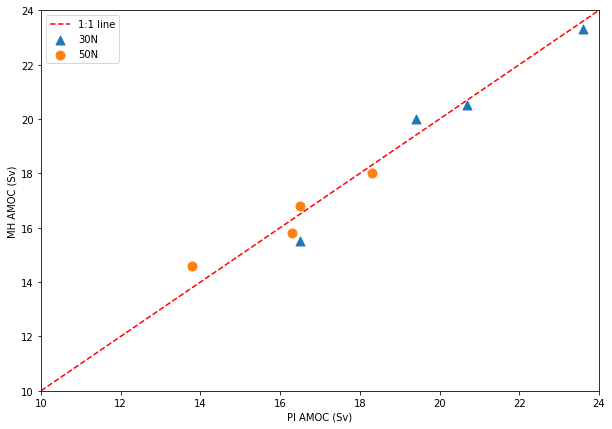

In [29]:
plt.figure(figsize=(10,7))
plt.xlim(10,24)
plt.ylim(10,24)
plt.scatter(AMOC['pi-30'],AMOC['mh-30'],s=80,marker='^',label='30N')
plt.scatter(AMOC['pi-50'],AMOC['mh-50'],s=80,marker='o',label='50N')
x1=np.arange(10,25)
y1=x1
plt.plot(x1,y1,"r--",label='1:1 line')
plt.legend()
plt.xlabel('PI AMOC (Sv)')
plt.ylabel('MH AMOC (Sv)')

In [17]:
x2=AMOC['pi-30']+AMOC['pi-50']
y2=AMOC['mh-30']+AMOC['mh-50']

[20.7, 23.6, 19.4, 16.5, 16.3, 18.3, 16.5, 13.8]

In [31]:
import scipy
lin=scipy.stats.linregress(x2, y2)
lin

LinregressResult(slope=1.0833999999999997, intercept=7.105427357601002e-15, rvalue=0.9999999999999996, pvalue=1.1075720816877522e-91, stderr=9.320695424676546e-09)

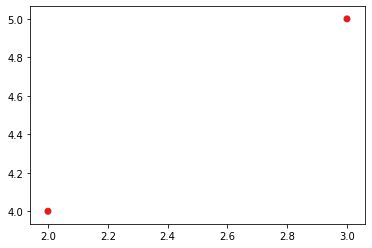

In [47]:
plt.scatter([2,3],[4,5],c=[5,5],cmap=cmap)

In [68]:
colorst

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]